# NYC COVID-19 summary

**Data source:** New York City Health Department's [COVID-19 Daily Data Summary](https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary.pdf)

## 0. Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## 1. Read Data

In [2]:
update_str = 'as reported by NYC Health on March 23, 2020, 5pm'
source_str = 'Data: nyc.gov/coronavirus - Plot: carlos-afonso.github.io/COVID-19'

data_file = '../data/nyc-health-daily-data-summary/nyc-covid-19-summary-from-2020-03-23.csv'

df = pd.read_csv(data_file)
df

,date,time,total_cases,age_median,age_min,age_max,age_0_to_17,age_18_to_44,age_45_to_64,age_65_to_74,...,sex_female,sex_male,sex_unknown,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten_island,borough_unknown,deaths
0,2020-03-23,9:35,12339,45,0,105,323,5704,4069,1308,...,5255,7067,17,1829,3494,2572,3621,817,6,99
1,2020-03-23,17:00,13119,45,0,105,341,6035,4343,1402,...,5612,7490,17,1999,3742,2646,3848,877,7,125


In [3]:
# Show latest data
df.iloc[-1]

date                     2020-03-23
time                          17:00
total_cases                   13119
age_median                       45
age_min                           0
age_max                         105
age_0_to_17                     341
age_18_to_44                   6035
age_45_to_64                   4343
age_65_to_74                   1402
age_75_and_over                 988
age_unknown                      10
age_50_and_over                5596
age_under_50                   7513
sex_female                     5612
sex_male                       7490
sex_unknown                      17
borough_bronx                  1999
borough_brooklyn               3742
borough_manhattan              2646
borough_queens                 3848
borough_staten_island           877
borough_unknown                   7
deaths                          125
Name: 1, dtype: object

## 2. Cases by Age Group

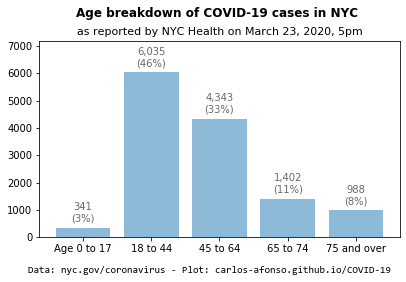

In [4]:
fig = plt.figure()

cols   = ['age_0_to_17', 'age_18_to_44', 'age_45_to_64', 'age_65_to_74', 'age_75_and_over']
labels = ['Age 0 to 17',     '18 to 44',     '45 to 64',     '65 to 74',     '75 and over']
values = df.iloc[-1][cols].values.astype(int)
total = sum(values)

plt.bar(labels, values, alpha=0.5)

plt.ylim(0, 7200)

for xy in zip(range(len(values)), values):
    note = '{:,}'.format(xy[1]) + '\n(' + str(int(round(100 * xy[1] / total, 0))) + '%)'
    plt.annotate(note, xy=xy, xytext=(0, 15), textcoords='offset points', ha='center', va='center', color='dimgray')

plt.suptitle('Age breakdown of COVID-19 cases in NYC', x=0.51, fontweight='bold')
plt.title(update_str, fontsize=11)

plt.text(-0.8, -1300, source_str, fontfamily='Consolas')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [5]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cases-by-age-group'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

## 3. Cases by Sex

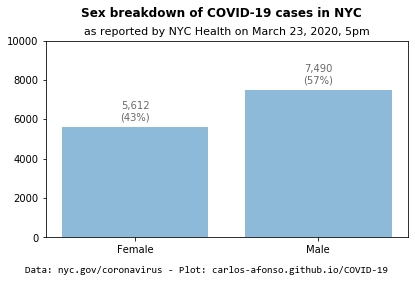

In [6]:
fig = plt.figure()

cols = ['sex_female', 'sex_male']
labels = ['Female', 'Male']
values = df.iloc[-1][cols].values.astype(int)
total = sum(values)

plt.bar(labels, values, alpha=0.5)

plt.ylim(0, 10000)

for xy in zip(range(len(values)), values):
    note = '{:,}'.format(xy[1]) + '\n(' + str(int(round(100 * xy[1] / total, 0))) + '%)'
    plt.annotate(note, xy=xy, xytext=(0, 15), textcoords='offset points', ha='center', va='center', color='dimgray')

plt.suptitle('Sex breakdown of COVID-19 cases in NYC', x=0.52, fontweight='bold')
plt.title(update_str, fontsize=11)

plt.text(-0.6, -1800, source_str, fontfamily='Consolas')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [7]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cases-by-sex'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

## 3. Cases by Borough

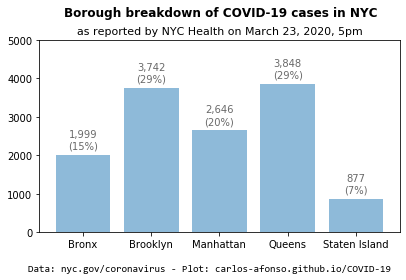

In [8]:
fig = plt.figure()

boroughs = ['bronx', 'brooklyn', 'manhattan', 'queens', 'staten_island']
cols = ['borough_' + b for b in boroughs]
labels = [b.replace('_', ' ').title() for b in boroughs]
values = df.iloc[-1][cols].values.astype(int)
total = sum(values)

plt.bar(labels, values, alpha=0.5)

plt.ylim(0, 5000)

for xy in zip(range(len(values)), values):
    note = '{:,}'.format(xy[1]) + '\n(' + str(int(round(100 * xy[1] / total, 0))) + '%)'
    plt.annotate(note, xy=xy, xytext=(0, 15), textcoords='offset points', ha='center', va='center', color='dimgray')

plt.suptitle('Borough breakdown of COVID-19 cases in NYC', x=0.52, fontweight='bold')

plt.title(update_str, fontsize=11)

plt.text(-0.8, -1000, source_str, fontfamily='Consolas')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [9]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cases-by-borough'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)